# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
from palmerpenguins import load_penguins
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would need to dummify species, island, and sex since these are categorical variables which need to formatted as dummy variables to use them in a regression model.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd

In [3]:
penguins = df.dropna()
x = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

model_lr = LinearRegression()
model_lr.fit(x, y)
predictions_lr = model_lr.predict(x)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
quad_model = LinearRegression()
quad_model.fit(x_poly2, y)
predictions_quad = quad_model.predict(x_poly2)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
cube_model = LinearRegression()
cube_model.fit(x_poly3, y)
predictions_cube = cube_model.predict(x_poly3)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(x)
ten_model = LinearRegression()
ten_model.fit(x_poly10, y)
predictions_ten = ten_model.predict(x_poly10)

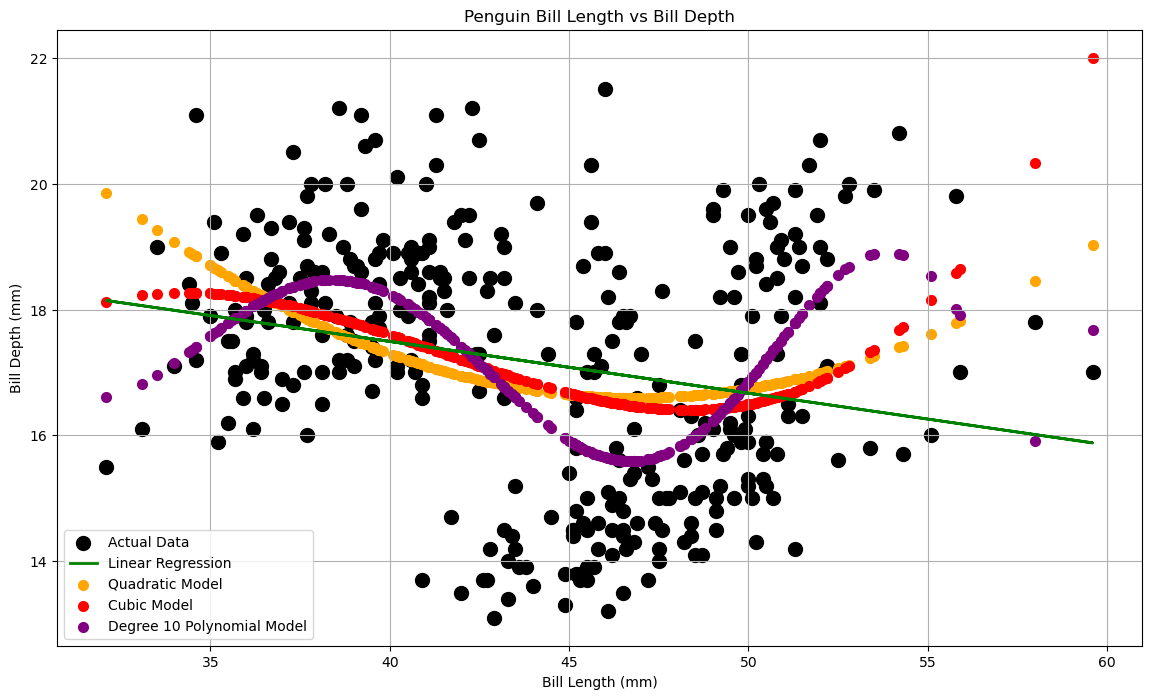

In [6]:
plt.figure(figsize=(14, 8))
plt.scatter(penguins['bill_length_mm'], penguins['bill_depth_mm'], color='black', label='Actual Data', s=100)
plt.plot(penguins['bill_length_mm'], predictions_lr, color='green', label='Linear Regression', linewidth=2)
plt.scatter(penguins['bill_length_mm'], predictions_quad, color='orange', label='Quadratic Model', linewidth=2)
plt.scatter(penguins['bill_length_mm'], predictions_cube, color='red', label='Cubic Model', linewidth=2)
plt.scatter(penguins['bill_length_mm'], predictions_ten, color='purple', label='Degree 10 Polynomial Model', linewidth=2)

plt.title('Penguin Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.grid()

In [9]:
plot_data = pd.DataFrame({
    'bill_length_mm': x['bill_length_mm'],
    'bill_depth_mm': y,
    'Linear Regression': predictions_lr,
    'Quadratic Model': predictions_quad,
    'Cubic Model': predictions_cube,
    'Degree 10 Polynomial Model': predictions_ten
})

plot_data.head()

,bill_length_mm,bill_depth_mm,Linear Regression,Quadratic Model,Cubic Model,Degree 10 Polynomial Model
0,39.1,18.7,17.567673,17.497696,17.766833,18.429731
1,39.5,17.4,17.534742,17.407049,17.693524,18.364799
2,40.3,18.0,17.468881,17.240135,17.540285,18.151744
4,36.7,19.3,17.765257,18.142249,18.127376,18.215172
5,39.3,20.6,17.551207,17.451773,17.730509,18.400875


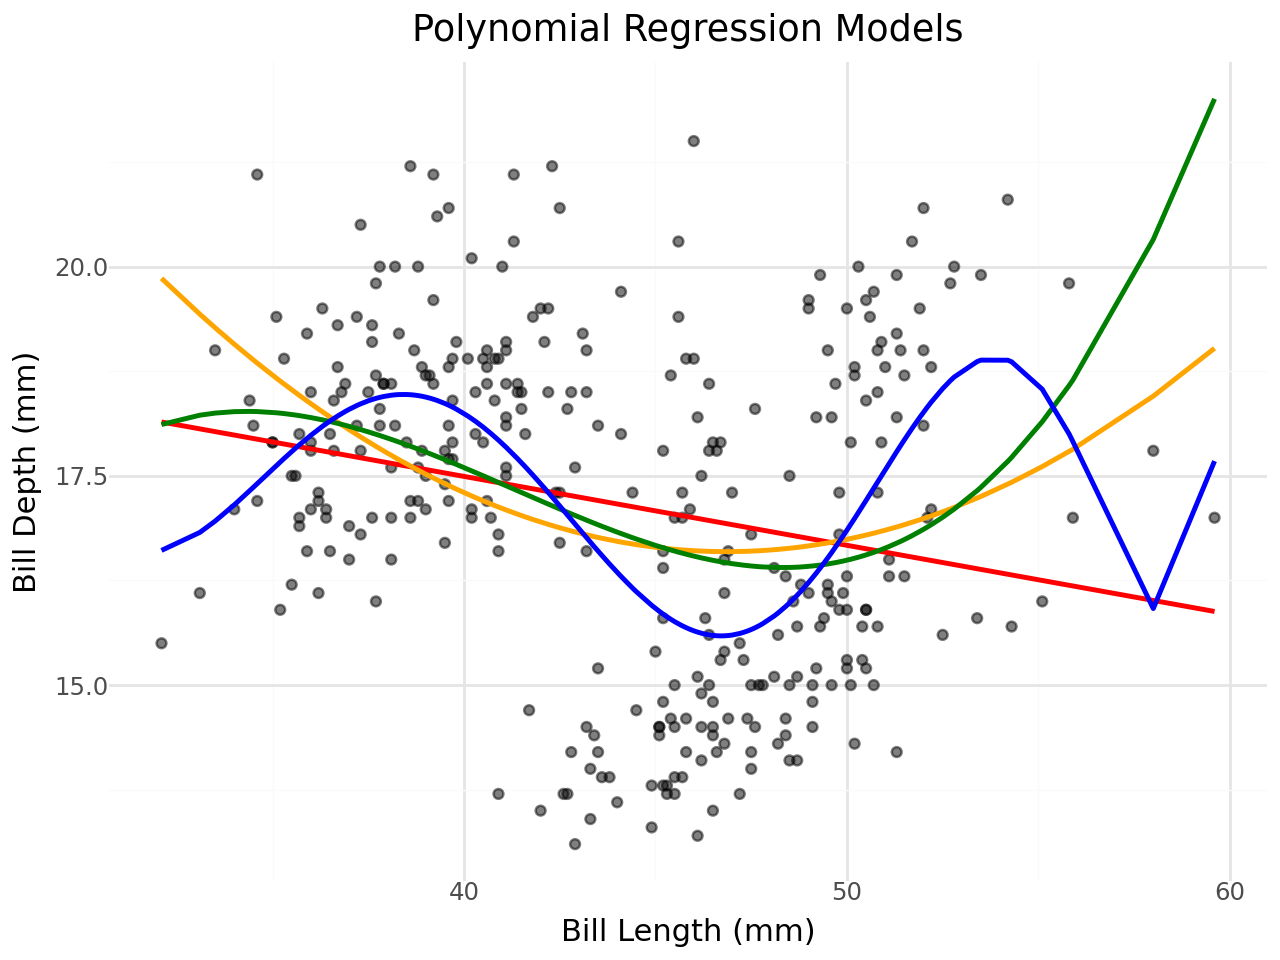

In [11]:
(ggplot(plot_data, aes(x='bill_length_mm')) +
     geom_point(aes(y='bill_depth_mm'), color='black', alpha=0.5) +  # Actual data points
     geom_line(aes(y='Linear Regression'), color='red', size=1) +  # Degree 1
     geom_line(aes(y='Quadratic Model'), color='orange', size=1) +  # Degree 2
     geom_line(aes(y='Cubic Model'), color='green', size=1) +  # Degree 3
     geom_line(aes(y='Degree 10 Polynomial Model'), color='blue', size=1) +  # Degree 10  
     labs(title='Polynomial Regression Models',
          x='Bill Length (mm)',
          y='Bill Depth (mm)') +
     theme_minimal()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

I beleive that the linear regression model is underfitting the data. This is because it isn't capturing the non-linear nature of the data points and is doing a bad job at capturing the complex relationship of the two variables.

I also think that the degree 10 model is overfitting the data because it is accounting for too much change in direction within the data. The model is following the shape of the data too closely which is a sign of overfitting. The model is making predictions that will likely do a bad job at accurately generalizing for observations outside of the data set that it is being trained on.

I think that the cubic model fits the data the best in this example. The cubic model does a good job at capturing some of the natural shape of the data, but it doesn't follow it too closely and overfit. As it is seen above, the regression line goes through many of the points on the left side of the plot, then curves downwards to capture the relationship in the middle of the graph, and lastly swings back up to follow the trend seen towards the right side of the graph. All of the other models don't do as good of a job at this.